In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


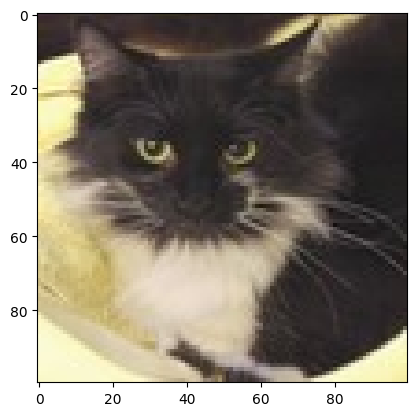

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 15s 449ms/step - loss: 0.7018 - accuracy: 0.5160
Epoch 2/5
32/32 [==============================] - 14s 435ms/step - loss: 0.6487 - accuracy: 0.6360
Epoch 3/5
32/32 [==============================] - 14s 441ms/step - loss: 0.5898 - accuracy: 0.6905
Epoch 4/5
32/32 [==============================] - 14s 430ms/step - loss: 0.5622 - accuracy: 0.7105
Epoch 5/5
32/32 [==============================] - 16s 508ms/step - loss: 0.5132 - accuracy: 0.7480


In [10]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 64ms/step - loss: 0.5964 - accuracy: 0.7100


[0.5964370965957642, 0.7099999785423279]

# Making predictions

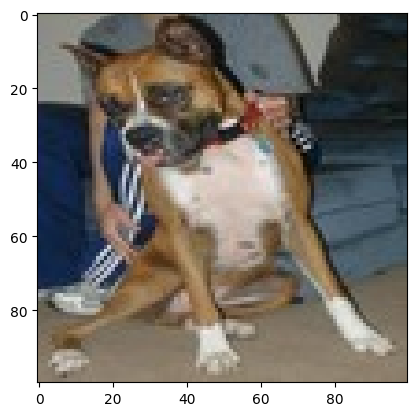

1/1 [==============================] - 0s 138ms/step
[[0.41236696]]
Our model says it is a : dog


In [11]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)
